# Effect of fund size on performance for Small-Cap Value mutual funds

Team Member: Benjamin Kanarick, Kyle Tobia, Ziyu (Louie) Wang

In [59]:
#Import all necessary packages to conduct our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Per Brandt's request, we chose this particular plotting color scheme in order to make our graphs stand out more
plt.style.use('seaborn-pastel')

### The codes below filters out tickers that fall in the category of a 'Small Cap Value' mutual fund

In [1]:
# fund_data = pd.read_csv('Fund Data HW 2.csv')
# fund_data.head()

In [3]:
# mask = fund_data[fund_data['lipper_class']=='SCVE']
# small_cap_list = list(mask['ticker'].unique())

In [4]:
# ticker_file = open('ticker.txt','w')
# for i in small_cap_list:
#     ticker_file.write(str(i) + '\n')
# ticker_file.close()

## The codes below deal with the data only containing SCVE tickers

In [5]:
df = pd.read_csv('Fund Returns.csv')
df.head()

,ticker,crsp_fundno,caldt,mtna,mret,mnav
0,CCTRX,274,1992/03/31,56.907,-0.012945,12.2000000
1,CCTRX,274,1991/06/28,63.950,-0.052259,10.7000000
2,CCTRX,274,1991/05/31,68.343,0.014126,11.2900000
3,CCTRX,274,1991/07/31,65.150,0.045794,11.1900000
4,CCTRX,274,1991/11/29,63.864,0.007443,11.7100000


In [6]:
df = df[df.ticker.notnull()].reset_index()

In [7]:
df.caldt = pd.to_datetime(df.caldt)   # change data type for calendar dates

# there were some data wrongly recorded as 'T', 'R', or 'N'
# we udpated the data with the assumption of replacing them by null value

df.mtna = df.mtna.replace('T', np.nan)   
df.mret = df.mret.replace('R', np.nan)
df.mnav = df.mnav.replace('N', np.nan)

df.mtna = pd.to_numeric(df.mtna)
df.mret = pd.to_numeric(df.mret)
df.mnav = pd.to_numeric(df.mnav)

### Overview and simple EDA of the Small Cap Value funds data

In [8]:
df

,index,ticker,crsp_fundno,caldt,mtna,mret,mnav
0,0,CCTRX,274,1992-03-31,56.907,-0.012945,12.20
1,1,CCTRX,274,1991-06-28,63.950,-0.052259,10.70
2,2,CCTRX,274,1991-05-31,68.343,0.014126,11.29
3,3,CCTRX,274,1991-07-31,65.150,0.045794,11.19
4,4,CCTRX,274,1991-11-29,63.864,0.007443,11.71
...,...,...,...,...,...,...,...
193574,209559,FTVAX,99710,2022-03-31,0.100,NaN,31.22
193575,209560,FTVCX,99711,2022-06-30,0.100,-0.090379,28.08
193576,209561,FTVCX,99711,2022-05-31,0.100,0.027630,30.87
193577,209562,FTVCX,99711,2022-04-29,0.100,-0.037488,30.04


In [9]:
# high level EDA, view the mean, std, and number of records for each ticker
eda_tick = df.groupby('ticker')[['mtna','mnav','mret']].agg(['mean','std','count'])
eda_tick

mtna                         mnav                      mret  \
               mean         std count       mean       std count      mean   
ticker                                                                       
AALVX     65.886982   24.213012   169  14.367988  3.327712   169  0.008941   
AASRX   1094.246154  592.696374    65  25.678615  4.029417    65  0.006070   
AASSX     58.916522   32.427877   230  21.178043  4.457967   230  0.008703   
AASVX    333.345161  125.673445   186  18.595753  5.129631   186  0.011541   
AAVFX      0.271429    0.132599    14  12.689286  0.757054    14  0.021447   
...             ...         ...   ...        ...       ...   ...       ...   
YOVLX      1.251351    1.085173    74  12.772297  2.509695    74  0.008305   
ZAPAX    222.641866   63.146430    97  15.331340  2.147332    97  0.007961   
ZAPBX     26.953722   21.617524    79  14.970000  2.518213    79  0.006011   
ZAPCX    167.001706   61.736677    85  15.310235  2.230084    85  0.006741   
ZPSVX      2.442857    1.364221    14  31.967950  6.308565    14  0.035947   

                        
             std count  
ticker                  
AALVX   0.053410   168  
AASRX   0.068451    64  
AASSX   0.058153   229  
AASVX   0.055860   186  
AAVFX   0.057798    14  
...          ...   ...  
YOVLX   0.059384    73  
ZAPAX   0.034867    97  
ZAPBX   0.038637    77  
ZAPCX   0.036425    85  
ZPSVX   0.060186    13  

[1258 rows x 9 columns]

In [10]:
df2 = df.copy()  # df2 will contain all df and mean values for three parameters
df2['mtna_mean'], df2['mnav_mean'], df2['mret_mean'] = 0, 0, 0

In [11]:
for idx, row in df2.iterrows():   # this block taks a while to execute
    ticker = row.ticker
    df2.loc[idx, 'mtna_mean'] = eda_tick['mtna'].loc[ticker]['mean']
    df2.loc[idx, 'mnav_mean'] = eda_tick['mnav'].loc[ticker]['mean']
    df2.loc[idx, 'mret_mean'] = eda_tick['mret'].loc[ticker]['mean']

In [12]:
df2

,index,ticker,crsp_fundno,caldt,mtna,mret,mnav,mtna_mean,mnav_mean,mret_mean
0,0,CCTRX,274,1992-03-31,56.907,-0.012945,12.20,20.753230,13.777127,0.007583
1,1,CCTRX,274,1991-06-28,63.950,-0.052259,10.70,20.753230,13.777127,0.007583
2,2,CCTRX,274,1991-05-31,68.343,0.014126,11.29,20.753230,13.777127,0.007583
3,3,CCTRX,274,1991-07-31,65.150,0.045794,11.19,20.753230,13.777127,0.007583
4,4,CCTRX,274,1991-11-29,63.864,0.007443,11.71,20.753230,13.777127,0.007583
...,...,...,...,...,...,...,...,...,...,...
193574,209559,FTVAX,99710,2022-03-31,0.100,NaN,31.22,4.796471,17.759290,0.009828
193575,209560,FTVCX,99711,2022-06-30,0.100,-0.090379,28.08,0.859398,17.959333,0.008339
193576,209561,FTVCX,99711,2022-05-31,0.100,0.027630,30.87,0.859398,17.959333,0.008339
193577,209562,FTVCX,99711,2022-04-29,0.100,-0.037488,30.04,0.859398,17.959333,0.008339


### Give each ticker/fund a bucket based on its average AUM (measured by the average mtna, `mtna_mean`)

In [13]:
cols = ['ticker','crsp_fundno','caldt','mtna','mnav','mret']
df3 = df2.copy()[cols]  # df3 will contain the percentile/quantiles of each ticker
mtna_rank = df2.mtna_mean.rank(ascending=True)
mnav_rank = df2.mnav_mean.rank(ascending=True)
mret_rank = df2.mret_mean.rank(ascending=True)

In [14]:
df3['mtna_quantile'] = pd.qcut(mtna_rank,4,labels=['0-25%','25-50%','50-75%','75-100%'])
df3['mnav_quantile'] = pd.qcut(mnav_rank,4,labels=['0-25%','25-50%','50-75%','75-100%'])
df3['mret_quantile'] = pd.qcut(mret_rank,4,labels=['0-25%','25-50%','50-75%','75-100%'])

In [15]:
df3

,ticker,crsp_fundno,caldt,mtna,mnav,mret,mtna_quantile,mnav_quantile,mret_quantile
0,CCTRX,274,1992-03-31,56.907,12.20,-0.012945,25-50%,25-50%,25-50%
1,CCTRX,274,1991-06-28,63.950,10.70,-0.052259,25-50%,25-50%,25-50%
2,CCTRX,274,1991-05-31,68.343,11.29,0.014126,25-50%,25-50%,25-50%
3,CCTRX,274,1991-07-31,65.150,11.19,0.045794,25-50%,25-50%,25-50%
4,CCTRX,274,1991-11-29,63.864,11.71,0.007443,25-50%,25-50%,25-50%
...,...,...,...,...,...,...,...,...,...
193574,FTVAX,99710,2022-03-31,0.100,31.22,NaN,0-25%,50-75%,75-100%
193575,FTVCX,99711,2022-06-30,0.100,28.08,-0.090379,0-25%,50-75%,50-75%
193576,FTVCX,99711,2022-05-31,0.100,30.87,0.027630,0-25%,50-75%,50-75%
193577,FTVCX,99711,2022-04-29,0.100,30.04,-0.037488,0-25%,50-75%,50-75%


In [16]:
# separate the dataframe into four subgroups based on their sizes/quantiles

size1 = df2[df3.mtna_quantile == '0-25%']
size2 = df2[df3.mtna_quantile == '25-50%']
size3 = df2[df3.mtna_quantile == '50-75%']
size4 = df2[df3.mtna_quantile == '75-100%']

In [18]:
# all_size_stats shows statistics for each bucket of tickers

all_size_stats = pd.DataFrame()
all_size_stats['size_quantile'] = ['0-25%','25-50%','50-75%','75-100%']
all_size_stats['tickers'] = [len(size1.groupby('ticker').count()),
                             len(size2.groupby('ticker').count()),
                             len(size3.groupby('ticker').count()),
                             len(size4.groupby('ticker').count())]
all_size_stats['min_aum'] = [size1.mtna.min(),size2.mtna.min(),size3.mtna.min(),size4.mtna.min()]
all_size_stats['max_aum'] = [size1.mtna.max(),size2.mtna.max(),size3.mtna.max(),size4.mtna.max()]
all_size_stats['mean_aum'] = [size1.mtna.mean(),size2.mtna.mean(),size3.mtna.mean(),size4.mtna.mean()]
all_size_stats['mean_nav'] = [size1.mnav.mean(),size2.mnav.mean(),size3.mnav.mean(),size4.mnav.mean()]
all_size_stats['mean_ret'] = [size1.mret.mean(),size2.mret.mean(),size3.mret.mean(),size4.mret.mean()]

all_size_stats

,size_quantile,tickers,min_aum,max_aum,mean_aum,mean_nav,mean_ret
0,0-25%,486,0.000,135.300,5.956418,16.165524,0.006376
1,25-50%,314,0.000,657.697,36.504081,19.422411,0.009702
2,50-75%,262,0.003,48945.600,140.798950,20.957101,0.008056
3,75-100%,196,0.000,63984.300,1195.702236,26.488126,0.008930


<AxesSubplot:xlabel='Bracket Size of Funds', ylabel='Mean Return'>

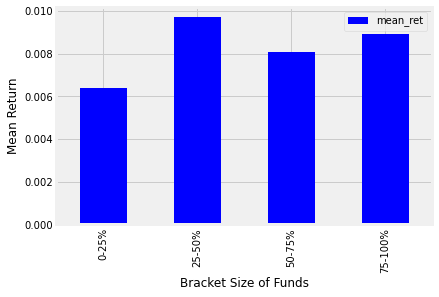

In [159]:
all_size_stats.plot.bar(x='size_quantile', 
                        y='mean_ret', 
                        xlabel = 'Bracket Size of Funds', 
                        ylabel = 'Mean Return', 
                        color = 'blue')

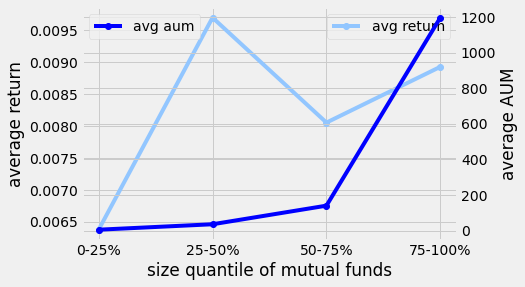

In [60]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(all_size_stats.size_quantile, all_size_stats.mean_ret,  marker='o', label='avg return')
ax2.plot(all_size_stats.size_quantile, all_size_stats.mean_aum, color='b', marker='o', label='avg aum')

ax1.legend()
ax2.legend()
ax1.set_xlabel('size quantile of mutual funds')
ax1.set_ylabel('average return')
ax2.set_ylabel('average AUM')

plt.show()

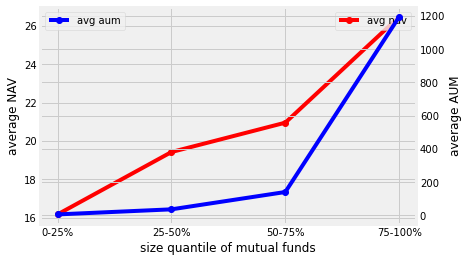

In [137]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(all_size_stats.size_quantile, all_size_stats.mean_nav, color = 'red', marker='o', label = 'avg nav')
ax2.plot(all_size_stats.size_quantile, all_size_stats.mean_aum, color='b', marker='o', label = 'avg aum')

ax1.set_xlabel('size quantile of mutual funds')
ax1.set_ylabel('average NAV')
ax2.set_ylabel('average AUM')
ax1.legend(loc = 1)
ax2.legend()
plt.show()

### Analysis on the relationship between a fund's performance (`mret`) and its size (`mtna`)

In [64]:
def plot_scatter(df, size_txt):
    y = df.groupby('ticker').mean()['mret_mean']
    x = df.groupby('ticker').mean()['mtna_mean']
    plt.scatter(x,y,marker='.')
    plt.xlabel('Mean AUM')
    plt.ylabel('Mean Rate of return')
    plt.title('Funds\' Average AUM vs Average return in Quantile ' + size_txt)
    plt.show()

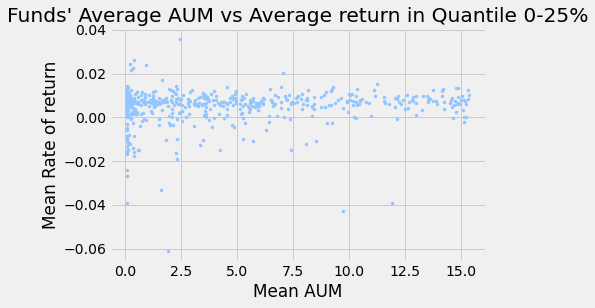

In [63]:
plot_scatter(size1, '0-25%')

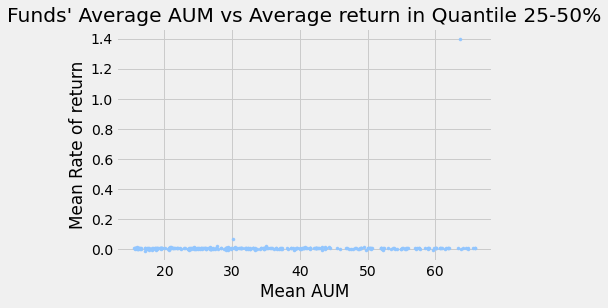

In [65]:
plot_scatter(size2, '25-50%')

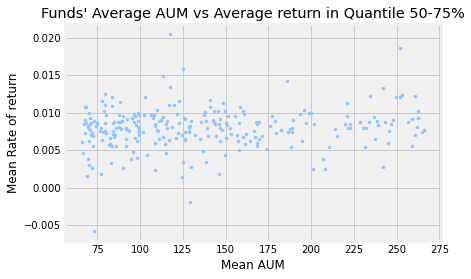

In [162]:
plot_scatter(size3, '50-75%')

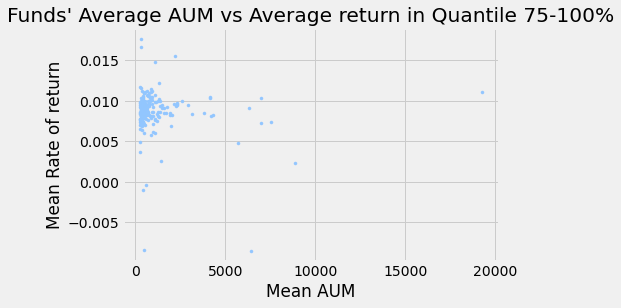

In [67]:
plot_scatter(size4, '75-100%')

### Analysis of the fund size and how long it exists (by calculating years it report NAVs)

In [69]:
def get_year(df):
    temp = df.copy()
    temp['year'] = temp.caldt.dt.year
    yr_length = temp.groupby('ticker')['year'].agg(['max','min'])
    temp = temp.merge(yr_length, left_on='ticker', right_on='ticker')
    temp['time_diff'] = temp['max'] - temp['min']
    temp = temp.drop(columns=['max','min','caldt'])
    return temp

In [70]:
time1 = get_year(size1)
time2 = get_year(size2)
time3 = get_year(size3)
time4 = get_year(size4)

In [71]:
time1_agg = time1.groupby('ticker').mean()[['mtna','mnav','mret','time_diff']]
time2_agg = time2.groupby('ticker').mean()[['mtna','mnav','mret','time_diff']]
time3_agg = time3.groupby('ticker').mean()[['mtna','mnav','mret','time_diff']]
time4_agg = time4.groupby('ticker').mean()[['mtna','mnav','mret','time_diff']]

In [72]:
def plot_hist_box(time_df, string):
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ax[0].boxplot(time_df.time_diff, vert=False)
    ax[1].hist(time_df.time_diff, bins=30)
    plt.xlabel('Years')
    plt.title('Time Span for a Fund\'s Report in Quantile ' + string)
    plt.show()

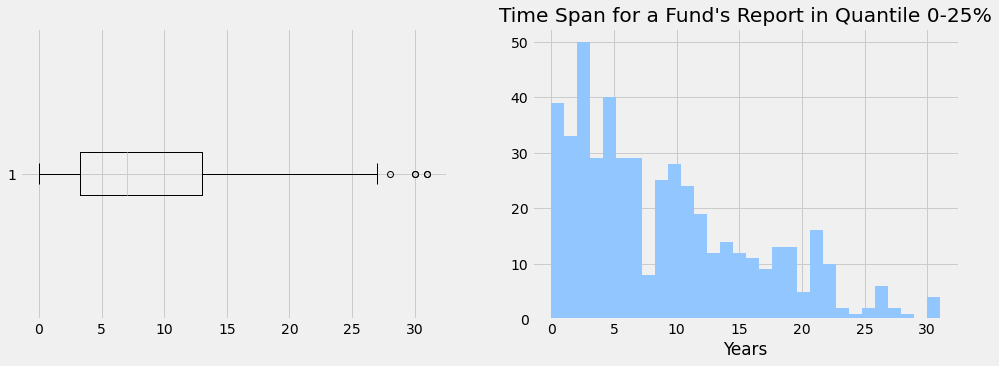

In [73]:
plot_hist_box(time1_agg, '0-25%')

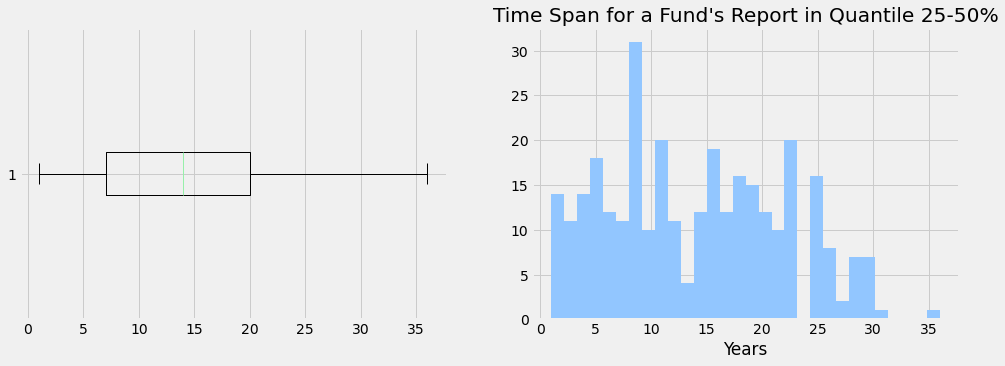

In [74]:
plot_hist_box(time2_agg, '25-50%')

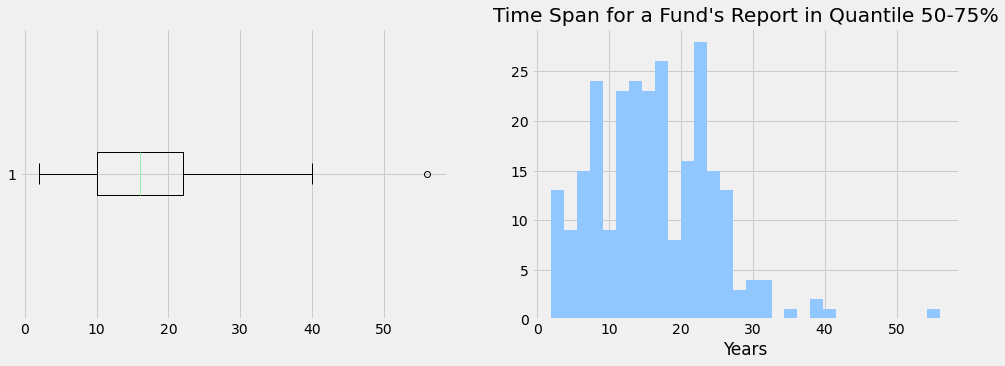

In [75]:
plot_hist_box(time3_agg, '50-75%')

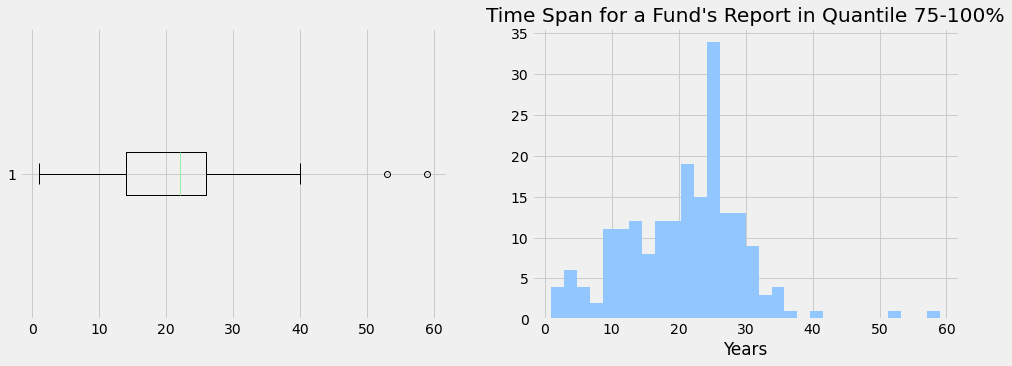

In [76]:
plot_hist_box(time4_agg, '75-100%')

**Code below: for each length of time, what is the difference in fund sizes? For example, for funds that report only 1 year, how many of them are in the 0-25% and so on**

In [36]:
df4 = get_year(df3).sort_values(by='time_diff')[['ticker','mtna_quantile','time_diff']].drop_duplicates('ticker')
df4 = df4.rename(columns={'time_diff':'Years a Fund Reports'})
df4

,ticker,mtna_quantile,Years a Fund Reports
166397,XSCVX,0-25%,0
166400,SCV,0-25%,0
162445,LISVX,0-25%,1
162446,LOSVX,0-25%,1
193578,WPGSX,0-25%,1
...,...,...,...
6279,RYVFX,75-100%,40
83908,CHNDX,50-75%,40
54018,FPPTX,75-100%,53
54604,FPRAX,50-75%,56


In [37]:
year_quant = df4.groupby(['Years a Fund Reports','mtna_quantile']).size().to_frame()
year_quant

0
Years a Fund Reports mtna_quantile    
0                    0-25%           2
                     25-50%          0
                     50-75%          0
                     75-100%         0
1                    0-25%          37
...                                 ..
56                   75-100%         0
59                   0-25%           0
                     25-50%          0
                     50-75%          0
                     75-100%         1

[168 rows x 1 columns]

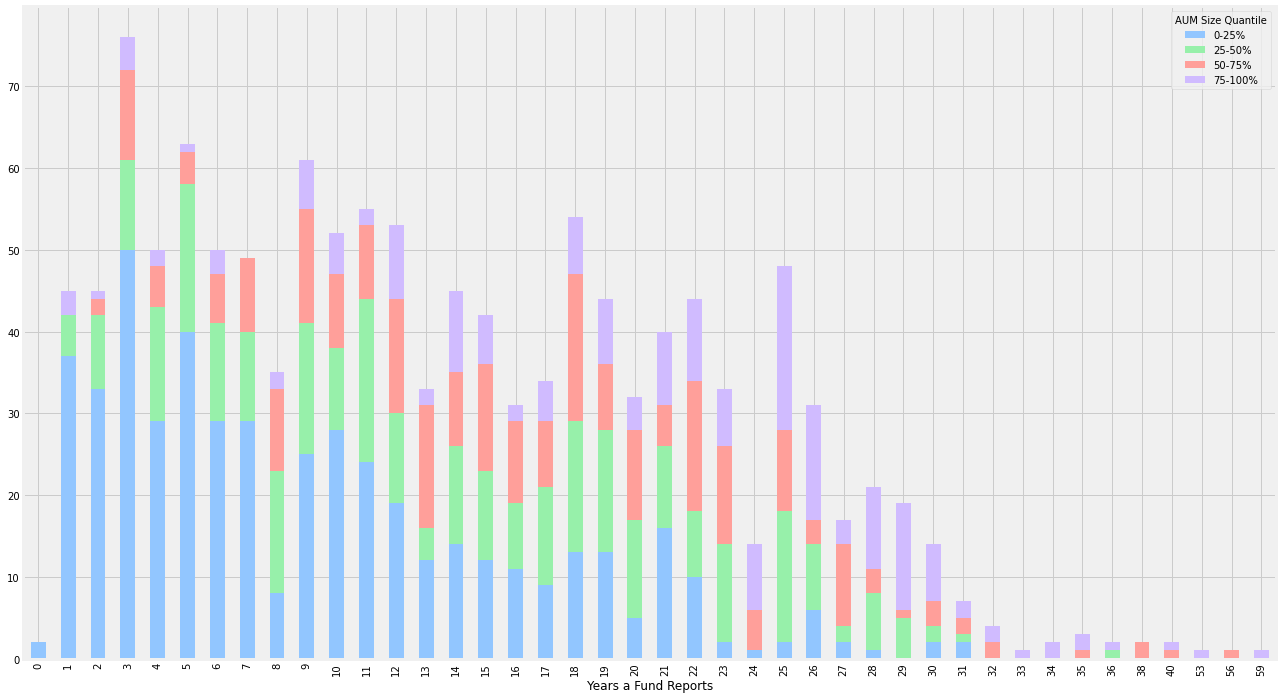

In [77]:
%matplotlib inline

fig = pd.crosstab(df4['Years a Fund Reports'], df4.mtna_quantile).plot.bar(figsize=(20,12), stacked=True)
fig.legend(title='AUM Size Quantile')

### Analysis on the relationship between a fund's size (`mtna`) and the volatility of its performance (`mret`)

In [39]:
def plot_scatter2(df, size_txt):
    y = df.groupby('ticker')['mret'].std()
    x = df.groupby('ticker')['mtna'].mean()
    plt.scatter(x,y,marker='.')
    plt.hlines(y.mean(), xmin=x.min(), xmax=x.max(), color='r', label='Quantile Average Volatility: {:.3f}'.format(y.mean()))
    plt.xlabel('Mean AUM')
    plt.ylabel('Variation of return')
    plt.legend()
    plt.title('Funds\' Average AUM vs Volatility in return in Quantile ' + size_txt)
    plt.show()

In [171]:
df2.groupby('ticker')['mret'].std().mean()

0.06647401068858687

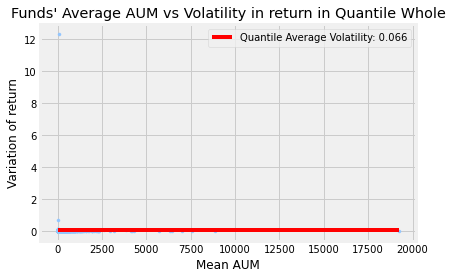

In [78]:
plot_scatter2(df2,'Whole')

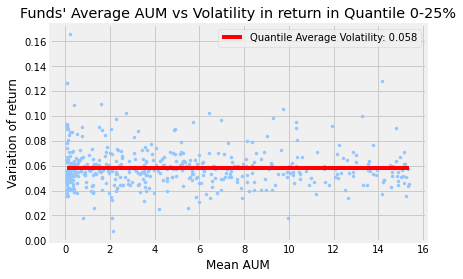

In [79]:
plot_scatter2(size1, '0-25%')

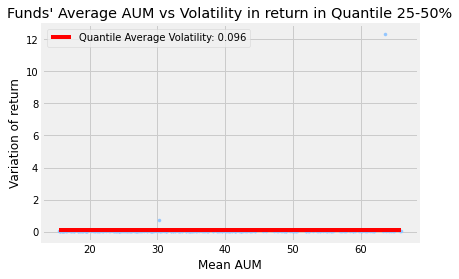

In [82]:
plot_scatter2(size2,'25-50%')

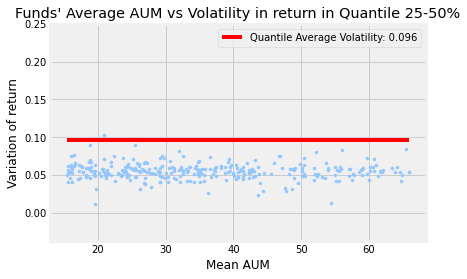

In [81]:
y = size2.groupby('ticker')['mret'].std()
x = size2.groupby('ticker')['mtna'].mean()
plt.scatter(x,y,marker='.')
plt.hlines(y.mean(), xmin=x.min(), xmax=x.max(), color='r', label='Quantile Average Volatility: {:.3f}'.format(y.mean()))
plt.xlabel('Mean AUM')
plt.ylabel('Variation of return')
plt.legend()
plt.title('Funds\' Average AUM vs Volatility in return in Quantile 25-50%')
plt.ylim(y.min()-0.05, 0.25)
plt.show()

**we see that the volatility of this bucket is particularly high. Thus, we eliminated two funds with very high volatility and redid the analysis to see the effect**

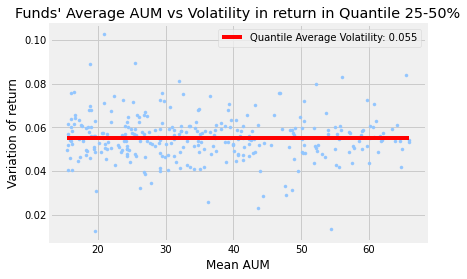

In [80]:
sorted_size2 = size2.groupby('ticker')[['mret','mtna']].std().sort_values(by='mret',ascending=False)

temp2 = sorted_size2.iloc[2:].index.to_list()
size2_0 = size2[size2.ticker.isin(temp2)]

y = size2_0.groupby('ticker')['mret'].std()
x = size2_0.groupby('ticker')['mtna'].mean()
plt.scatter(x,y,marker='.')
plt.hlines(y.mean(), xmin=x.min(), xmax=x.max(), color='r', label='Quantile Average Volatility: {:.3f}'.format(y.mean()))
plt.xlabel('Mean AUM')
plt.ylabel('Variation of return')
plt.legend()
plt.title('Funds\' Average AUM vs Volatility in return in Quantile 25-50%')
plt.show()

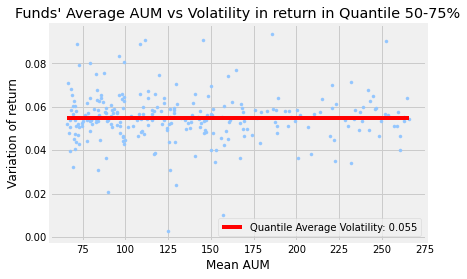

In [83]:
plot_scatter2(size3,'50-75%')

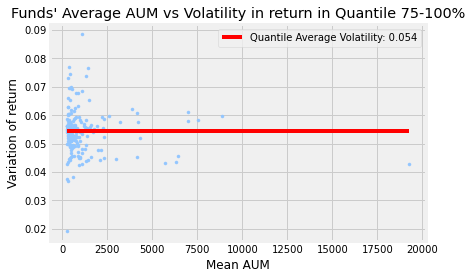

In [84]:
plot_scatter2(size4,'75-100%')

In [48]:
all_size_stats['std_ret'] = [size1.mret.std(),size2.mret.std(),size3.mret.std(),size4.mret.std()]
all_size_stats

,size_quantile,tickers,min_aum,max_aum,mean_aum,mean_nav,mean_ret,std_ret
0,0-25%,486,0.000,135.300,5.956418,16.165524,0.006376,0.058302
1,25-50%,314,0.000,657.697,36.504081,19.422411,0.009702,0.505404
2,50-75%,262,0.003,48945.600,140.798950,20.957101,0.008056,0.055147
3,75-100%,196,0.000,63984.300,1195.702236,26.488126,0.008930,0.054185


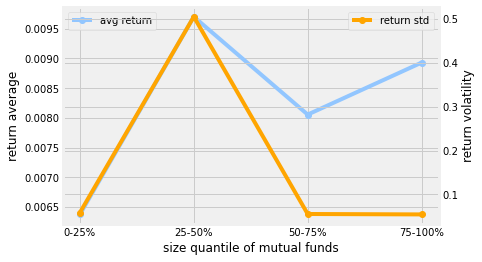

In [132]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(all_size_stats.size_quantile, all_size_stats.mean_ret, marker='o', label = 'avg return')
ax2.plot(all_size_stats.size_quantile, all_size_stats.std_ret, color = 'orange', marker='o', label = 'return std')

ax1.set_xlabel('size quantile of mutual funds')
ax1.set_ylabel('return average')
ax2.set_ylabel('return volatility')
ax1.legend(loc = 2)
ax2.legend(loc = 0)
plt.show()

### This piece of code displays the average returns for all four buckets over the duration of all funds

In [51]:
def my_func(df):
    temp = df.copy()
    temp['year'] = temp.caldt.dt.year
    temp = temp.drop(columns='caldt')
    return temp

In [52]:
df5 = df3.copy()[['ticker','caldt','mret','mtna_quantile']]
df5 = my_func(df5)

In [53]:
bucket1 = df5[df5.mtna_quantile=='0-25%']
bucket2 = df5[df5.mtna_quantile=='25-50%']
bucket3 = df5[df5.mtna_quantile=='50-75%']
bucket4 = df5[df5.mtna_quantile=='75-100%']

In [54]:
y1 = bucket1.groupby('year')['mret'].mean()
y2 = bucket2.groupby('year')['mret'].mean()
y3 = bucket3.groupby('year')['mret'].mean()
y4 = bucket4.groupby('year')['mret'].mean()

In [55]:
x1 = y1.index.to_numpy()
x2 = y2.index.to_numpy()
x3 = y3.index.to_numpy()
x4 = y4.index.to_numpy()

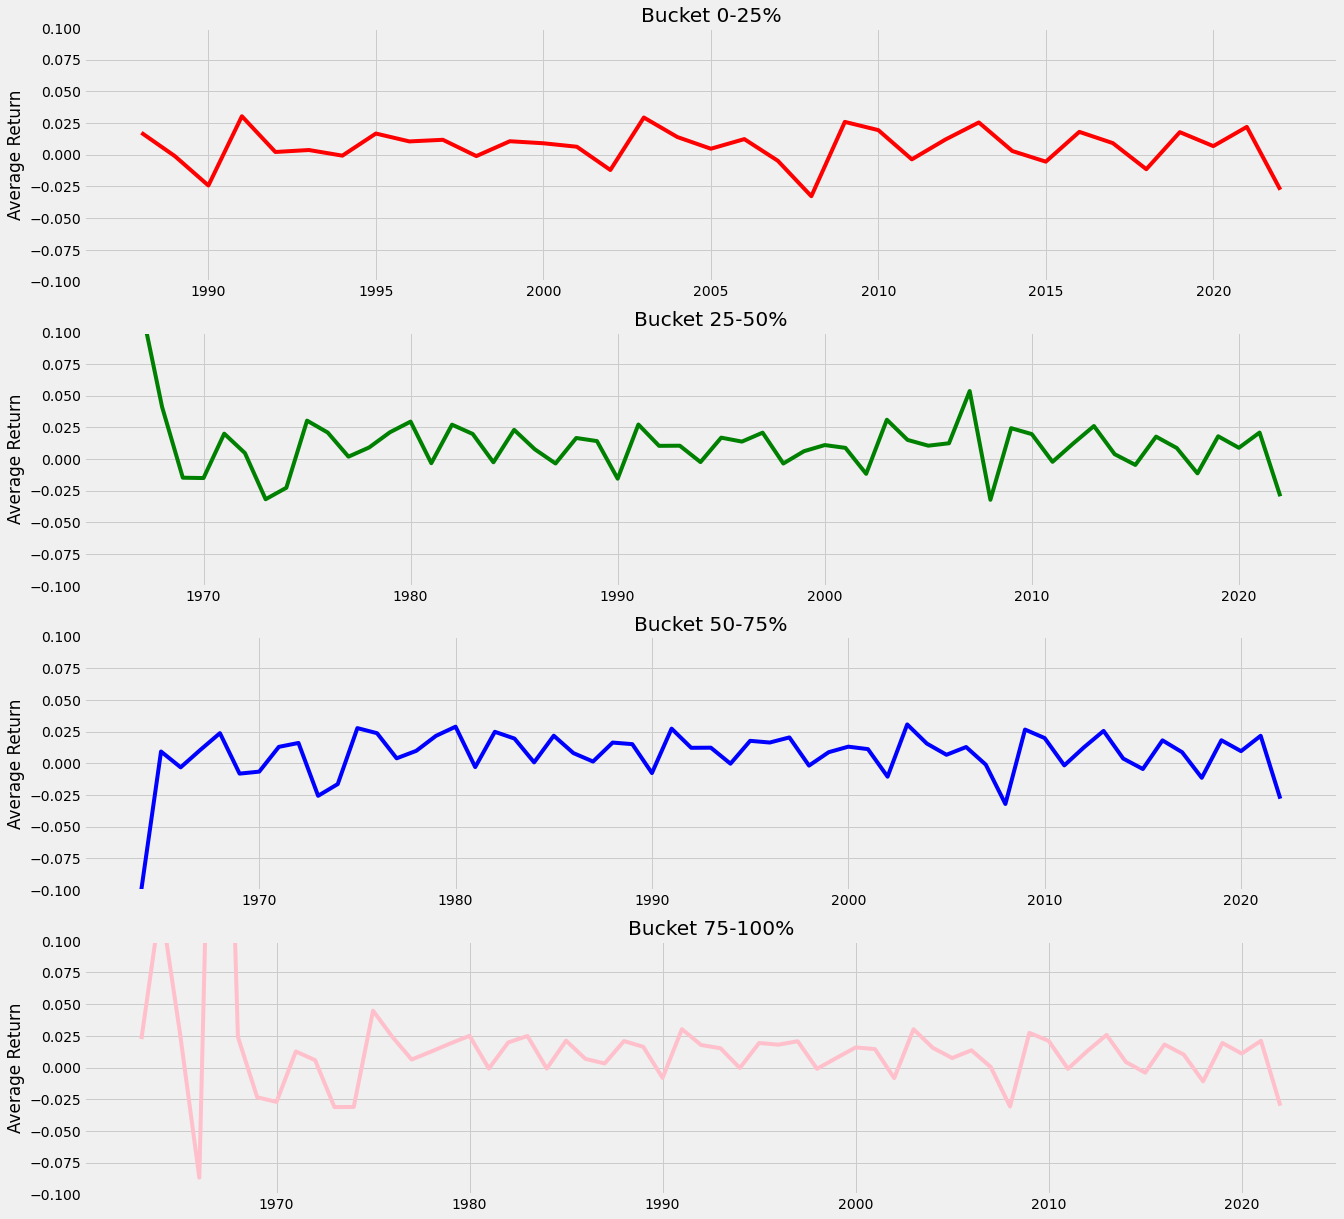

In [56]:
obj = [y1,y2,y3,y4]
xs = [x1,x2,x3,x4]
co = ['r','g','b','pink']
names = ['0-25%','25-50%','50-75%','75-100%']
fig, ax = plt.subplots(4,1, figsize=(20,20))
for i in range(4):
    x = xs[i]
    y = obj[i]
    ax[i].plot(x,y,color=co[i])
    ax[i].title.set_text('Bucket ' + names[i])
    ax[i].set_ylim(-0.1,0.1)
    
plt.setp(ax, ylabel='Average Return')
plt.show() 

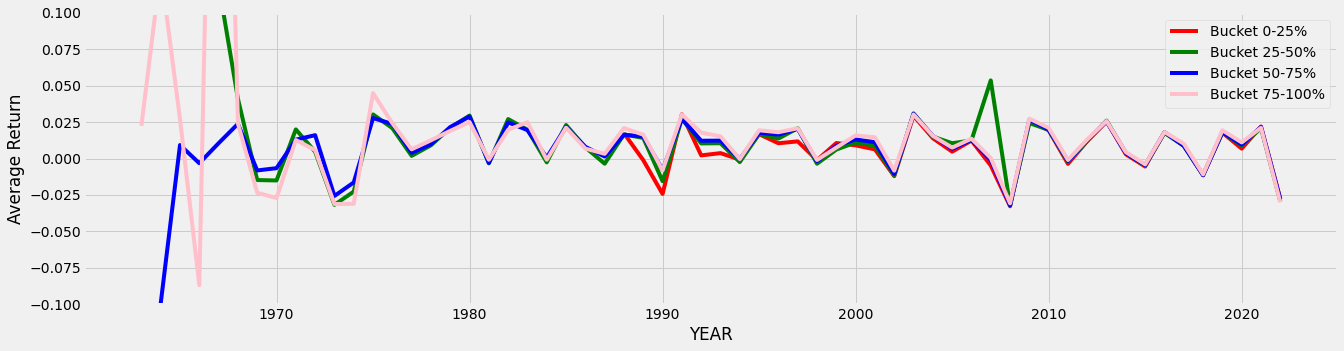

In [57]:
obj = [y1,y2,y3,y4]
xs = [x1,x2,x3,x4]
co = ['r','g','b','pink']
names = ['0-25%','25-50%','50-75%','75-100%']
plt.figure(figsize=(20,5))
for i in range(4):
    x = xs[i]
    y = obj[i]
    plt.plot(x,y,color=co[i], label='Bucket ' + names[i])
    

plt.ylim(-0.1,0.1)
plt.legend()    
plt.xlabel('YEAR')
plt.ylabel('Average Return')
plt.show() 